# Analyzing Ford GoBike Data
Dec-2019

by Fernando de Moraes Gabriel

## Introduction
In this project, the Ford GoBike System Dateset that contains trip data from lyft's bike service for public use in the period January-June 2019 was analyzed.

> Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.
> More about the data [here](https://www.fordgobike.com/system-data)

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import glob
import os
import datetime
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('fordgobike_master_cleaned.csv', sep=',')
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,member_age,start_month,start_weekday,duration_min
0,4861,No,80825,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2019-02-01 16:24:49.864,1989.0,Male,229.0,37.775745,-122.213037,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.613,Subscriber,30.0,January,Thu,1347.083333
1,5506,No,65900,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.173,1989.0,Male,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-01-31 20:58:33.886,Subscriber,30.0,January,Thu,1098.333333
2,2717,No,62633,157.0,37.846784,-122.291376,65th St at Hollis St,2019-02-01 11:30:46.530,1965.0,Female,245.0,37.870139,-122.268422,Downtown Berkeley BART,2019-01-31 18:06:52.924,Customer,54.0,January,Thu,1043.883333
3,4557,No,44680,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.318,1974.0,Male,85.0,37.770083,-122.429156,Church St at Duboce Ave,2019-01-31 19:46:09.719,Customer,45.0,January,Thu,744.666667
4,3532,No,6733,266.0,37.862464,-122.264791,Parker St at Fulton St,2019-02-01 00:28:04.512,1994.0,Male,245.0,37.870139,-122.268422,Downtown Berkeley BART,2019-01-31 22:35:50.813,Subscriber,25.0,January,Thu,112.216667


## Ford GoBike Usage per Age and Gender
> The mean age of a Ford GoBike user is 34 years old. The data was cleaned, using for the analysis users under the age 65. The majority of users are adults between 25-40 years old. Male are majority between subscribers and customers. Female are close in number of trips among younger customers, 15-25 years old, and older customers, 56-65 years old.

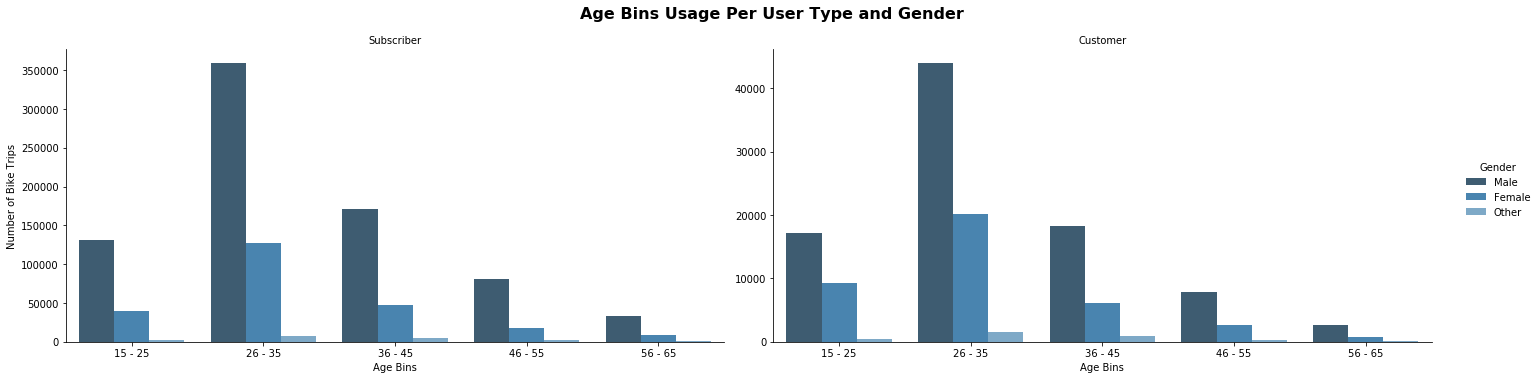

In [3]:
df['age_bins'] = df['member_age'].apply(lambda x: '15 - 25' if 15<x<=25
                                                  else '26 - 35' if 25<x<=35
                                                  else '36 - 45' if 35<x<=45
                                                  else '46 - 55' if 45<x<=55
                                                  else '56 - 65' if 55<x<=66
                                                       else x)
ages = ['15 - 25', '26 - 35', '36 - 45', '46 - 55', '56 - 65']
graph = sb.catplot(data=df, x='age_bins', col="user_type", hue="member_gender", kind='count', palette="Blues_d", sharey = False, height=5, aspect=2, order=ages);

graph.set_axis_labels("Age Bins", "Number of Bike Trips")
graph._legend.set_title('Gender')
graph.set_titles("{col_name}")

graph.fig.suptitle('Age Bins Usage Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

## Ford GoBike Usage by Month
> In the first half of 2019, the Ford GoBike use was most popular in the period between March and April. It is interesting to see that in June, early summer, the number of bike trips decreased.

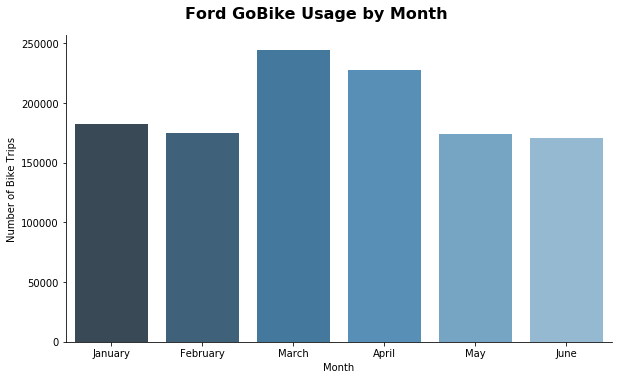

In [4]:
Months = ['January', 'February', 'March', 'April', 'May', 'June']
graph = sb.catplot(data = df, x = 'start_month', kind = 'count', palette="Blues_d", order = Months, aspect = 1.7);

graph.set_axis_labels('Month', 'Number of Bike Trips'),

graph.fig.suptitle('Ford GoBike Usage by Month', y = 1.05, fontsize = 16, fontweight = 'bold');

## Ford GoBike Usage by Weekday
> Subscribers have a considerating usage decrease on the weekends and Customers are the opposite, when the usage increases on the weekends. Regardless of gender, customers had the most trips on Saturdays and subscribers had the most trips on Thursdays.

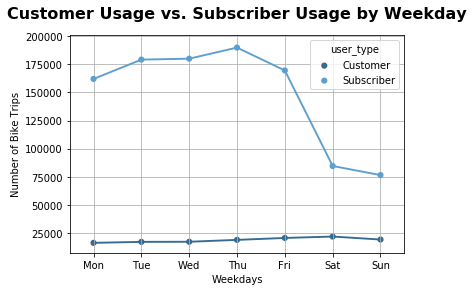

In [5]:
df_weekday = df.groupby(['start_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax = sb.pointplot(data=df_weekday, x='start_weekday', y=0, hue = 'user_type', scale=.7, palette="Blues_d", order = weekday);

plt.title('Customer Usage vs. Subscriber Usage by Weekday', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

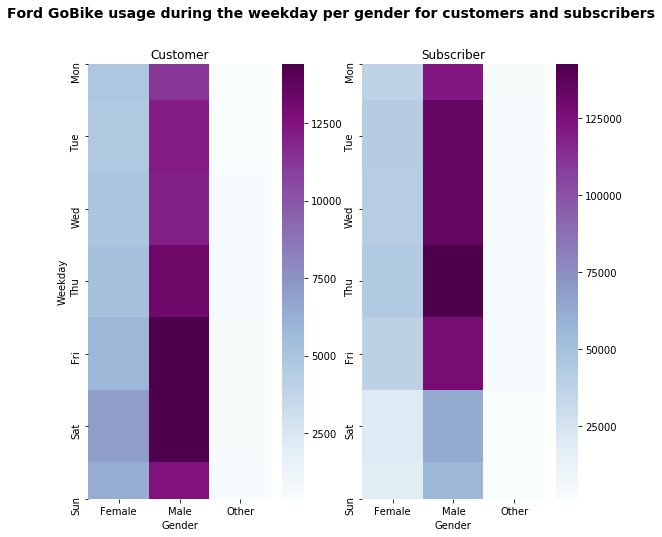

In [6]:
# Setting the weekday order
df['start_weekday'] = pd.Categorical(df['start_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Ford GoBike usage during the weekday per gender for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df.query('user_type == "Customer"').groupby(["start_weekday", "member_gender"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_weekday", "member_gender", "bike_id")
sb.heatmap(df_customer, cmap="BuPu")

plt.title("Customer", y=1.015)
plt.xlabel('Gender')
plt.ylabel('Weekday')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df.query('user_type == "Subscriber"').groupby(["start_weekday", "member_gender"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_weekday", "member_gender", "bike_id")
sb.heatmap(df_subscriber, cmap="BuPu")

plt.title("Subscriber", y=1.015)
plt.xlabel('Gender')
plt.ylabel('');

## Trip Duration Exploration
> Customer typically have trip durations are longer (8 to 18 minutes) than for subscribers (5 to 12 minutes), maybe by the fact that subscribers take short trips to work/school and customers take longer trips for a tour on the weekends. In both cases, females take longer trips than males and other. The difference is more visible for customers than for subscribers, where other genre is very similar to Female.

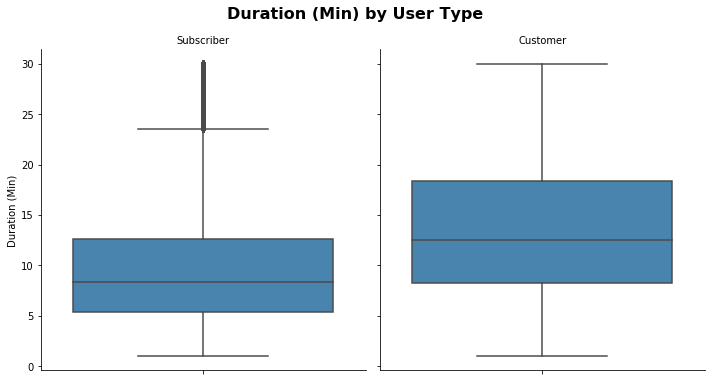

In [7]:
data = df.query('duration_min < 30')

g = sb.catplot(data=data, y='duration_min', col="user_type",palette="Blues_d", kind='box')

g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Duration (Min)")
g.fig.suptitle('Duration (Min) by User Type', y=1.05, fontsize=16, fontweight='bold');

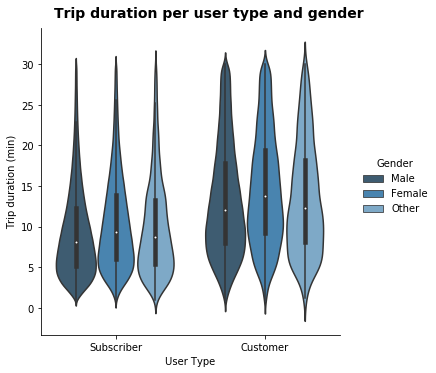

In [8]:
# working with 95th percentile
graph = sb.catplot(data=data, x='user_type', y="duration_min", hue="member_gender", palette="Blues_d", kind="violin")

graph.set_axis_labels("User Type", "Trip duration (min)")
graph._legend.set_title('Gender')
graph.fig.suptitle('Trip duration per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

## Summary
> Renting a bike from Ford GoBike System is a fantastic way of moving around in urban areas, both for pleasure and work. There are two types of clients using the system: subscribers who are mainly daily commuters, having short trips to and from work, who rent a bike on weekdays to go to work/shcool, and customers, usually tourists or occassional riders who use the system mainly on weekends to explore the Bay Area.

In [ ]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 466432 bytes to slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck.slides.html
Use Control-C to stop this server
